# Potential overal Netflix Challenge and IMDb Extended Dataset

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns

# Running the notebook needed for merging
%run IMDb_walk_through.ipynb
print(ratings_per_movie)

C:\Data\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

NameError: name 'ratings_per_movie' is not defined

### Reading in the data

In [3]:
# Where data is located
movies_file = '../data/movies.csv'
users_file = '../data/users.csv'
ratings_file = '../data/ratings.csv'
predictions_file = '../data/predictions.csv'
submission_file = '../data/submission.csv'

# Read the data using pandas
movies_description = pd.read_csv(movies_file, delimiter=';', dtype={'movieID': 'int', 'year': 'int', 'movie': 'str'},
                                 names=['movieID', 'year', 'movie'])
users_description = pd.read_csv(users_file, delimiter=';',
                                dtype={'userID': 'int', 'gender': 'str', 'age': 'int', 'profession': 'int'},
                                names=['userID', 'gender', 'age', 'profession'])
ratings_description = pd.read_csv(ratings_file, delimiter=';',
                                  dtype={'userID': 'int', 'movieID': 'int', 'rating': 'int'},
                                  names=['userID', 'movieID', 'rating'])
predictions_description = pd.read_csv(predictions_file, delimiter=';', names=['userID', 'movieID'], header=None)

#### Searching for duplicates

In [4]:
duplicateRowsDF = movies_description[movies_description.duplicated(['movie'])].sort_values(by=['movie'])
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
      movieID  year          movie
334       335     0    Ace_Ventura
1228     1229     0     Amityville
2480     2481     0  Austin_Powers
3326     3327     0           Crow
1843     1844     0      Godfather
1926     1927     0      Halloween
1978     1979     0          Henry
3383     3384     0        Mission
962       963     0     Robin_Hood
2200     2201     0      Star_Trek
1272     1273     0      Star_Trek
1258     1259     0      Star_Trek
1275     1276     0      Star_Trek
1120     1121     0      Star_Wars
1106     1107     0      Star_Wars
2426     2427     0      Star_Wars
299       300     0   Three_Colors
298       299     0   Three_Colors


## Data Analysis for IMDb + Netflix Challenge

In [5]:
movies_description.head()

,movieID,year,movie
0,1,1995,Toy_Story_(1995)
1,2,1995,Jumanji_(1995)
2,3,1995,Grumpier_Old_Men_(1995)
3,4,1995,Waiting_to_Exhale_(1995)
4,5,1995,Father_of_the_Bride_Part_II_(1995)


In [6]:
# Replacing our current dataset with normal titles that can be identified with the ones from the IMDb dataset

movies_refactored = movies_description.copy()
movies_refactored['movie'] = movies_refactored['movie'].str.replace('_',' ')
movies_refactored['movie'] = movies_refactored['movie'].str.replace(r"\(.*\)","")
movies_refactored['movie'] = movies_refactored['movie'].str.strip()

movies_refactored.head()

,movieID,year,movie
0,1,1995,Toy Story
1,2,1995,Jumanji
2,3,1995,Grumpier Old Men
3,4,1995,Waiting to Exhale
4,5,1995,Father of the Bride Part II


### Combining the two datasets

In [7]:
all_movies = pd.merge(movies_refactored, movies, how='left', left_on='movie', right_on='original_title')

all_movies = pd.DataFrame(all_movies).reset_index()
given = pd.DataFrame(movies_refactored).reset_index()

print('unique all', all_movies['movieID'].nunique())
print('unique given', given['movieID'].nunique())

imdb_given = all_movies.drop_duplicates('movieID', keep='first')
print(imdb_given.shape)
imdb_given.head()



## IMDB_GIVEN is the one that we are going o use

unique all 3706
unique given 3706
(3706, 26)


,index,movieID,year_x,movie,imdb_title_id,title,original_title,year_y,date_published,genre,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,0,1,1995,Toy Story,tt0114709,Toy Story - Il mondo dei giocattoli,Toy Story,1995,1996-03-22,"Animation, Adventure, Comedy",...,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",A cowboy doll is profoundly threatened and jea...,8.3,864461.0,$ 30000000,$ 222498679,$ 404265438,95.0,617.0,160.0
1,1,2,1995,Jumanji,tt0113497,Jumanji,Jumanji,1995,1996-02-23,"Adventure, Comedy, Family",...,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,7.0,299083.0,$ 65000000,$ 100499940,$ 262821940,39.0,255.0,73.0
2,2,3,1995,Grumpier Old Men,tt0113228,That's amore! Due improbabili seduttori,Grumpier Old Men,1995,1996-04-18,"Comedy, Romance",...,"Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",John and Max resolve to save their beloved bai...,6.7,23742.0,$ 25000000,$ 71518503,$ 71518503,46.0,65.0,29.0
3,3,4,1995,Waiting to Exhale,tt0114885,Donne,Waiting to Exhale,1995,1996-01-18,"Comedy, Drama, Romance",...,"Whitney Houston, Angela Bassett, Loretta Devin...","Based on Terry McMillan's novel, this film fol...",5.9,9353.0,$ 16000000,$ 67052156,$ 81452156,NaN,53.0,29.0
4,4,5,1995,Father of the Bride Part II,tt0113041,Il padre della sposa 2,Father of the Bride Part II,1995,1996-02-02,"Comedy, Family, Romance",...,"Steve Martin, Diane Keaton, Martin Short, Kimb...",George Banks must deal not only with the pregn...,6.1,33587.0,$ 30000000,$ 76594107,$ 76594107,49.0,70.0,38.0


### Removing unnecessary columns

In [8]:
all_data_movies = imdb_given.copy()
print('All columns of the dataset:', list(all_data_movies.columns), '\n')
all_data_movies.drop(["index", "title", "original_title", "year_y", "date_published",
                    "language", 'country', 'language', 'director', 'writer', 
                    'production_company', 'actors', 'description', 'budget',
                      'votes', 'reviews_from_users', 'reviews_from_critics',
                     'usa_gross_income', 'duration',  'worlwide_gross_income'], inplace=True, axis=1)

all_data_movies.rename(columns = {'year_x':'year'}, inplace = True)
print('All columns of the dataset, after removal:', list(all_data_movies.columns))

All columns of the dataset: ['index', 'movieID', 'year_x', 'movie', 'imdb_title_id', 'title', 'original_title', 'year_y', 'date_published', 'genre', 'duration', 'country', 'language', 'director', 'writer', 'production_company', 'actors', 'description', 'avg_vote', 'votes', 'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore', 'reviews_from_users', 'reviews_from_critics'] 

All columns of the dataset, after removal: ['movieID', 'year', 'movie', 'imdb_title_id', 'genre', 'avg_vote', 'metascore']


In [9]:
all_data_movies.head()

,movieID,year,movie,imdb_title_id,genre,avg_vote,metascore
0,1,1995,Toy Story,tt0114709,"Animation, Adventure, Comedy",8.3,95.0
1,2,1995,Jumanji,tt0113497,"Adventure, Comedy, Family",7.0,39.0
2,3,1995,Grumpier Old Men,tt0113228,"Comedy, Romance",6.7,46.0
3,4,1995,Waiting to Exhale,tt0114885,"Comedy, Drama, Romance",5.9,NaN
4,5,1995,Father of the Bride Part II,tt0113041,"Comedy, Family, Romance",6.1,49.0


### Checking data validity

In [10]:
nan_values = np.where(all_data_movies != all_data_movies)
print('Total number of rows with missing data:', np.unique(nan_values).shape[0])

# Replace missing numerical values with the median of the column
# Replace missing string values with the most frequent value in the column
all_data_movies.fillna(all_data_movies.mean(), inplace=True)
all_data_movies.fillna(all_data_movies.mode(numeric_only=False).iloc[0], inplace=True)

Total number of rows with missing data: 2396


In [11]:
all_data_movies.head()

,movieID,year,movie,imdb_title_id,genre,avg_vote,metascore
0,1,1995,Toy Story,tt0114709,"Animation, Adventure, Comedy",8.3,95.000000
1,2,1995,Jumanji,tt0113497,"Adventure, Comedy, Family",7.0,39.000000
2,3,1995,Grumpier Old Men,tt0113228,"Comedy, Romance",6.7,46.000000
3,4,1995,Waiting to Exhale,tt0114885,"Comedy, Drama, Romance",5.9,59.853659
4,5,1995,Father of the Bride Part II,tt0113041,"Comedy, Family, Romance",6.1,49.000000


# Converting numerical interpretation

In [12]:
# mapping to 1-5 scale
all_data_movies['avg_vote'] = all_data_movies['avg_vote'].apply(lambda x: (x * 5) / 10)
all_data_movies['metascore'] = all_data_movies['metascore'].apply(lambda x: (x * 5) / 100)

In [13]:
all_data_movies = all_data_movies[['movieID', 'imdb_title_id', 'year', 'movie', 'avg_vote', 'metascore', 'genre' ]]
all_data_movies.head()

,movieID,imdb_title_id,year,movie,avg_vote,metascore,genre
0,1,tt0114709,1995,Toy Story,4.15,4.750000,"Animation, Adventure, Comedy"
1,2,tt0113497,1995,Jumanji,3.50,1.950000,"Adventure, Comedy, Family"
2,3,tt0113228,1995,Grumpier Old Men,3.35,2.300000,"Comedy, Romance"
3,4,tt0114885,1995,Waiting to Exhale,2.95,2.992683,"Comedy, Drama, Romance"
4,5,tt0113041,1995,Father of the Bride Part II,3.05,2.450000,"Comedy, Family, Romance"


## Using encoding for the genres

In [16]:
all_movies_encoded = pd.concat([all_data_movies.drop('genre', 1), all_data_movies['genre'].str.get_dummies(sep=", ")], 1)
full_movies = all_movies_encoded.copy()
full_movies.drop(['year', 'avg_vote', 'metascore','movieID', 'imdb_title_id', 'movie'], inplace=True, axis=1)
full_movies.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Graphs

In [70]:
combined_movies_data_all_movies = pd.merge(movies_description, ratings_description, how='left', on='movieID')
combined_movies_data_all_movies_numpy = combined_movies_data_all_movies.to_numpy()

def add_ratings_for_movies_with_no_ratings():
    """
    As the title suggests, this method adds new ratings
    to movies that have not been rated by a user
    :return: the new ratings to be added
    """
    row_has_NaN = combined_movies_data_all_movies.isnull().any(axis=1)
    a = row_has_NaN.to_numpy()
    indices_of_nan = (a == True).nonzero()
    movies_with_no_ratings = combined_movies_data_all_movies_numpy[indices_of_nan[0]][:, 0]
    result = np.array(ratings_numpy, copy=True)
    temp = np.empty((0, 3))
    for i in range(1, 101):
        avg = average_rating(i)
        for j in movies_with_no_ratings:
            temp = np.vstack([temp, [int(i), int(j), np.round(avg, decimals=4)]])
    result = np.concatenate((result, temp), axis=0)
    return result

def average_rating(user_id):
    """
    Function that returns the average rating for a given user.
    :param user_id The id of the user
    :return the average rating for the given user
    """
    return np.mean(ratings_per_userID[user_id - 1])

In [71]:
combined_movies_data_all_movies = pd.merge(movies_description, ratings_description, how='left', on='movieID')
combined_movies_data_all_movies_numpy = combined_movies_data_all_movies.to_numpy()

predictions_numpy = predictions_description.to_numpy()
ratings_numpy = ratings_description.to_numpy()

ratings_numpy = ratings_numpy[ratings_numpy[:, 0].argsort()]
ratings_per_userID = np.split(ratings_numpy[:, 2], np.unique(ratings_numpy[:, 0], return_index=True)[1][1:])

ratings_numpy_all_movies = add_ratings_for_movies_with_no_ratings()
ratings_description_all_movies = pd.DataFrame.from_records(ratings_numpy_all_movies)
ratings_description_all_movies = ratings_description_all_movies.rename(columns={0: "userID", 1: "movieID", 2: "rating"})

combined_movies_data = pd.merge(movies_description, ratings_description, on='movieID')

aggregated = ratings_description_all_movies.groupby('movieID')['rating'].agg(['count', 'mean']).reset_index()
aggregated.head()

,movieID,count,mean
0,1.0,1896,4.143460
1,2.0,635,3.192126
2,3.0,443,3.033860
3,4.0,155,2.722581
4,5.0,270,2.985185


In [72]:
aggregated.shape

(3706, 3)

In [73]:
# plot idea: 
# ratings that we currently have from the people: dict(movieID, avg_rating)
# vs. ratings that we have obtained from the imdb dataset dict(movieID, avg_rating_imdb)
side_by_side = pd.concat([aggregated['mean'], all_data_movies['avg_vote'], all_data_movies['metascore']], axis=1)
side_by_side.head()

,mean,avg_vote,metascore
0,4.143460,4.15,4.750000
1,3.192126,3.50,1.950000
2,3.033860,3.35,2.300000
3,2.722581,2.95,2.992683
4,2.985185,3.05,2.450000


<IPython.core.display.Javascript object>


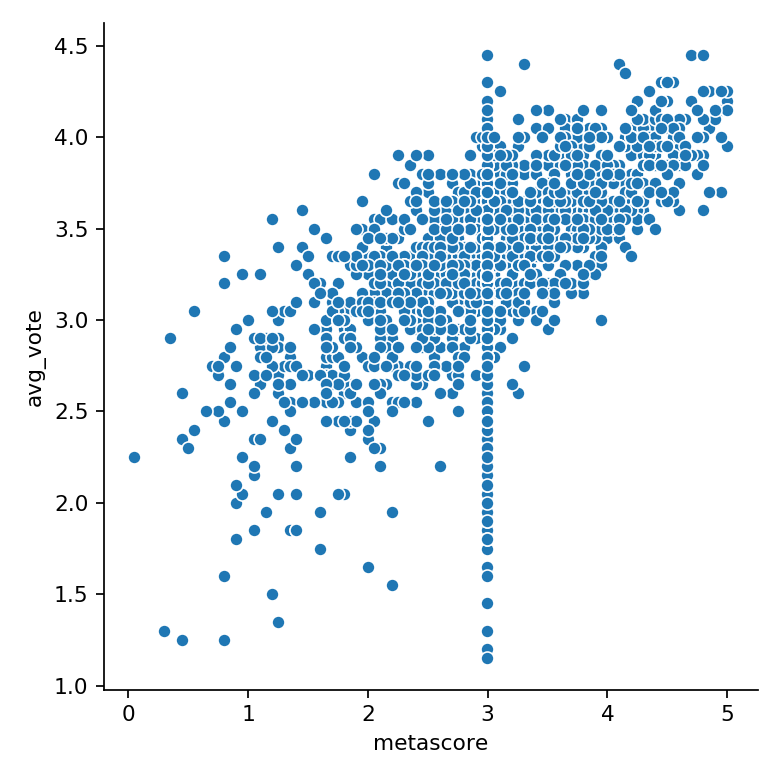

In [74]:
# avg_vote against metascore
sns.relplot(data=side_by_side, x="metascore", y="avg_vote")
plt.show()

In [ ]:
# leftovers
dict_ratings_given = dict(zip(aggregated['movieID'], aggregated['mean']))
dict_ratings_imdb = dict(zip(all_data_movies['movieID'], all_data_movies['avg_vote']))
print(len(dict_ratings_given))
print(len(dict_ratings_imdb))